In [ ]:
# !wget https://www.dropbox.com/scl/fi/pmcibrh9z8dbibqczhmh2/spam.csv?rlkey=1y5d87f4cbcswq1flgufmvh0z&dl=0

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = 'spam.csv?rlkey=1y5d87f4cbcswq1flgufmvh0z'
data = pd.read_csv(file_path)
data.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.shape

(5572, 2)

In [ ]:
# Converting the words into indexs without using keras Tokenizer

# Empty vocabulary dictionary
vocab = {}

# Start the index from 1 (0 can be reserved for padding/unknown tokens)
index = 1

for i, df in data.iterrows():

  words = df["text"].split()  # Replace this with your tokenization logic
  for w in words:
      if w not in vocab:
          vocab[w] = index
          index += 1

vocab['<PAD>'] = 0
vocab['<UNK>'] = index

In [ ]:
vocab_size = len(vocab)
vocab_size

15587

In [ ]:
# [vocab.get(d, vocab["<UNK>"]) for d in data["text"][38].split()]
word_idx = []

for index, df in data.iterrows():
  w_ind = [vocab.get(d, vocab["<UNK>"]) for d in data["text"][index].split()]
  word_idx.append(w_ind)

In [ ]:
max_len = max([len(i) for i in word_idx])
max_len

171

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(word_idx, data["label"], test_size=0.2, random_state = 23)

In [ ]:
# COnnverting label string into numerical value

y_train = y_train.replace({'ham': 0, 'spam': 1})
y_test = y_test.replace({'ham': 0, 'spam': 1})

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import Dropout
from keras.models import Sequential

In [ ]:
X_train_data = sequence.pad_sequences(X_train, maxlen = max_len)
X_test_data = sequence.pad_sequences(X_test, maxlen = max_len)

In [ ]:
print("The shape of training data",X_train_data.shape)
print("The shape of testing data",X_test_data.shape)

The shape of training data (4457, 171)
The shape of testing data (1115, 171)


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 16))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          249392    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                5184      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 254641 (994.69 KB)
Trainable params: 254641 (994.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="rmsprop", loss ="binary_crossentropy", metrics = ["acc"] )

In [ ]:
hist =  model.fit(X_train_data, y_train, validation_split=0.2, epochs = 10, batch_size=80)

Epoch 1/10
45/45 [==============================] - 15s 303ms/step - loss: 0.4446 - acc: 0.8320 - val_loss: 0.4190 - val_acc: 0.8587
Epoch 2/10
45/45 [==============================] - 11s 241ms/step - loss: 0.4052 - acc: 0.8620 - val_loss: 0.3792 - val_acc: 0.8587
Epoch 3/10
45/45 [==============================] - 10s 223ms/step - loss: 0.3210 - acc: 0.8727 - val_loss: 0.2171 - val_acc: 0.9462
Epoch 4/10
45/45 [==============================] - 9s 195ms/step - loss: 0.1641 - acc: 0.9515 - val_loss: 0.1163 - val_acc: 0.9675
Epoch 5/10
45/45 [==============================] - 9s 210ms/step - loss: 0.0916 - acc: 0.9705 - val_loss: 0.1238 - val_acc: 0.9596
Epoch 6/10
45/45 [==============================] - 10s 223ms/step - loss: 0.0552 - acc: 0.9849 - val_loss: 0.0845 - val_acc: 0.9776
Epoch 7/10
45/45 [==============================] - 9s 201ms/step - loss: 0.0472 - acc: 0.9868 - val_loss: 0.1049 - val_acc: 0.9686
Epoch 8/10
45/45 [==============================] - 7s 166ms/step - loss

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
model_loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len(acc)+1)

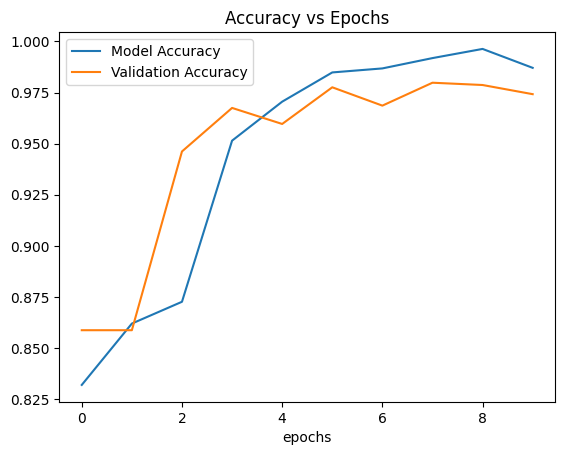

In [ ]:
plt.plot(acc, label = "Model Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("epochs")
plt.legend(loc = "best")
plt.show()

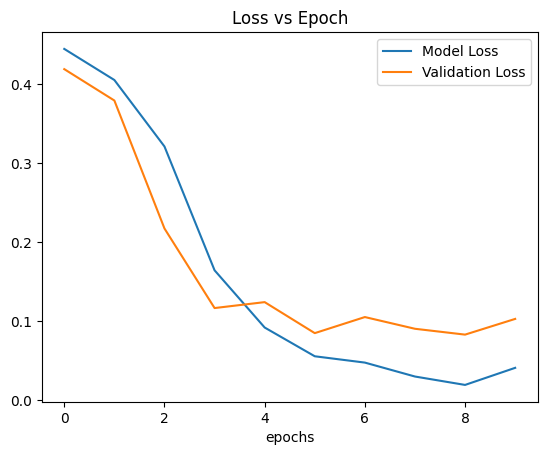

In [ ]:
plt.plot(model_loss, label = "Model Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("epochs")
plt.legend(loc = "best")
plt.show()

In [ ]:
# We r gonna save this for future prediction.

model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls # The model is saved as we can see

 my_model.h5   sample_data  'spam.csv?rlkey=1y5d87f4cbcswq1flgufmvh0z'


In [ ]:
model.load_weights("my_model.h5")

In [ ]:
model.evaluate(X_test_data, y_test)

35/35 [==============================] - 1s 22ms/step - loss: 0.1001 - acc: 0.9659


[0.10009843856096268, 0.9659192562103271]

In [ ]:
model.evaluate(X_train_data, y_train)

140/140 [==============================] - 3s 21ms/step - loss: 0.0289 - acc: 0.9928


[0.02888517826795578, 0.9928202629089355]

In [ ]:
# To store the best model we are use keras callback function.

from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("best_model.h5", monitor = "val_loss", verbose=3, save_best_only=True, period=1)
history = model.fit(X_train_data, y_train, validation_split=0.2,epochs=10, batch_size=80, callbacks=[checkpoint])

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 0.0086 - acc: 0.9986
Epoch 1: val_loss improved from inf to 0.10381, saving model to best_model.h5
45/45 [==============================] - 9s 196ms/step - loss: 0.0086 - acc: 0.9986 - val_loss: 0.1038 - val_acc: 0.9765
Epoch 2/10
 1/45 [..............................] - ETA: 5s - loss: 0.0016 - acc: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - ETA: 0s - loss: 0.0089 - acc: 0.9978
Epoch 2: val_loss did not improve from 0.10381
45/45 [==============================] - 9s 192ms/step - loss: 0.0089 - acc: 0.9978 - val_loss: 0.1226 - val_acc: 0.9686
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 0.0224 - acc: 0.9935
Epoch 3: val_loss improved from 0.10381 to 0.09581, saving model to best_model.h5
45/45 [==============================] - 9s 191ms/step - loss: 0.0224 - acc: 0.9935 - val_loss: 0.0958 - val_acc: 0.9798
Epoch 4/10
45/45 [==============================] - ETA: 0s - loss: 0.0062 - acc: 0.9986
Epoch 4: val_loss did not improve from 0.09581
45/45 [==============================] - 8s 173ms/step - loss: 0.0062 - acc: 0.9986 - val_loss: 0.1032 - val_acc: 0.9753
Epoch 5/10
45/45 [==============================] - ETA: 0s - loss: 0.0102 - acc: 0.9969
Epoch 5: val_loss did not improve from 0.09581
45/45 [==============================] - 8s 182ms/step - loss: 0.0102

In [ ]:
!ls  # here we have our best model

 best_model.h5	 sample_data
 my_model.h5	'spam.csv?rlkey=1y5d87f4cbcswq1flgufmvh0z'


In [ ]:
model.load_weights("best_model.h5")

In [ ]:
model.evaluate(X_test_data, y_test)

35/35 [==============================] - 1s 21ms/step - loss: 0.1011 - acc: 0.9749


[0.10108789056539536, 0.9748879075050354]

In [ ]:
model.evaluate(X_train_data, y_train)

140/140 [==============================] - 2s 14ms/step - loss: 0.0236 - acc: 0.9946


[0.023607056587934494, 0.9946151971817017]

- The model Accuracy increased(0.965 ---> 0.974) on test data by using the best model(best_model.h5)

In [ ]:
y_pred = model.predict(X_test_data)
y_pred_classes = (y_pred > 0.5).astype(int)

35/35 [==============================] - 2s 41ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_classes)


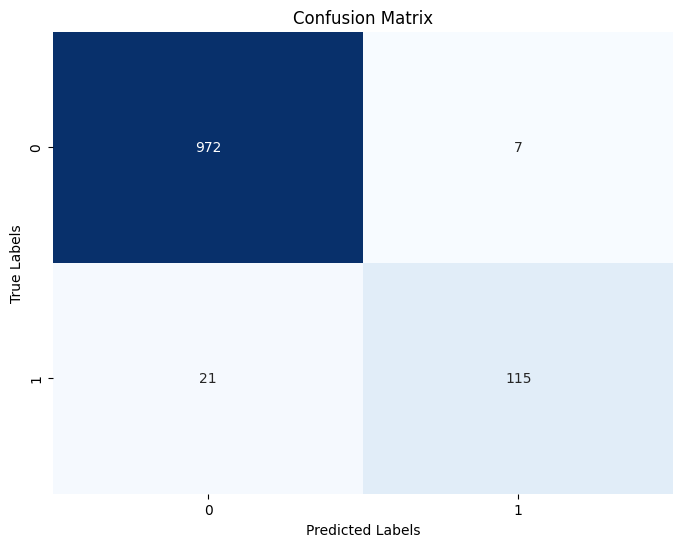

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
